In [4]:
#preprocess and split per review using nltk sent_tokenize
import string
import pandas as pd
import csv
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np


df = pd.read_csv("reviews.csv") 

df.columns = ['city', 'price', 'rating','restaurant', 'review_desc', 'title_review']
#df['title_review1'] = df['title_review'].str.lower().str.split()  
#df['review_desc1'] = df['review_desc'].str.lower().str.split()
df['city'] = df['city'].str.strip('[]').astype(str)
df['price'] = df['price'].str.strip('[]').astype(str)
df['rating'] = df['rating'].str.strip('[]').astype(str)
df['restaurant'] = df['restaurant'].str.strip('[]').astype(str)
df['review_desc'] = df['review_desc'].str.strip('[]').astype(str)
df['title_review'] = df['title_review'].str.strip('[]').astype(str)

#city
df['city'] = df.city.str.lower()
df.loc[df['city'].str.contains('yogyakarta', na=False), 'city'] = 'yogyakarta'
df.loc[df['city'].str.contains('bogor', na=False), 'city'] = 'bogor'
df.loc[df['city'].str.contains('jakarta', na=False), 'city'] = 'jakarta'
df.loc[df['city'].str.contains('riau', na=False), 'city'] = 'batam'
df.loc[df['city'].str.contains('ubud', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('legian', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('seminyak', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('nusa dua', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('denpasar', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('bandung', na=False), 'city'] = 'bandung'
df.loc[df['city'].str.contains('surabaya', na=False), 'city'] = 'surabaya'
df.loc[df['city'].str.contains('kuta', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('semarang', na=False), 'city'] = 'semarang'
df.loc[df['city'].str.contains('malang', na=False), 'city'] = 'malang'
df.loc[df['city'].str.contains('medan', na=False), 'city'] = 'medan'
df.loc[df['city'].str.contains('solo', na=False), 'city'] = 'solo'
df.loc[df['city'].str.contains('canggu', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('jimbaran', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('palembang', na=False), 'city'] = 'palembang'  
df.loc[df['city'].str.contains('pecatu', na=False), 'city'] = 'bali'   
df.loc[df['city'].str.contains('tanjung benoa', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('sukawati', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('kerobokan', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('ungasan', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('80', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('mengwi', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('tabanan', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('bedugul', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('padangbai', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('uluwatu', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('tegalalang', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('singaraja', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('083', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('821', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('tibubeneng', na=False), 'city'] = 'bali'

#price
df.loc[df['price'] == '€', 'price'] = 'cheap eats'
df.loc[df['price'] == '€€ - €€€', 'price'] = 'mid range'
df.loc[df['price'] == '€€€€', 'price'] = 'fine dining'

#rating
df = df[df.rating.str.len() > 0]
df.loc[df['rating'] == '4.0 ', 'rating'] = '4.0'
df.loc[df['rating'] == '4.5 ', 'rating'] = '4.5'
df.loc[df['rating'] == '3.5 ', 'rating'] = '3.5'
df.loc[df['rating'] == '5.0 ', 'rating'] = '5.0'
df.loc[df['rating'] == '3.0 ', 'rating'] = '3.0'
df.loc[df['rating'] == '2.5 ', 'rating'] = '2.5'
df.loc[df['rating'] == '2.0 ', 'rating'] = '2.0'
df.loc[df['rating'] == '1.0 ', 'rating'] = '1.0'
df.loc[df['rating'] == '1.5 ', 'rating'] = '1.5'
df.loc[df['rating'] == ' ', 'rating'] = np.NaN

rows = list()
for row in df[['city', 'price', 'rating','restaurant', 'review_desc']].iterrows():
    r = row[1]
    #sent tokenizer for each restaurant reviews row
    for word in sent_tokenize(r.review_desc.decode('utf-8')):
        rows.append((r.city, r.price, r.rating, r.restaurant,  word))

review_words = pd.DataFrame(rows, columns=['city', 'price', 'rating','restaurant', 'review_desc'])
review_words['review_desc'] = review_words['review_desc'].str.strip('[]')
review_words['review_desc'] = review_words.review_desc.str.replace("'", '')
review_words

,city,price,rating,restaurant,review_desc
0,yogyakarta,cheap eats,5.0,Sate Ratu,"Satenya lain dr pd yg lain, one of the best sa..."
1,yogyakarta,cheap eats,5.0,Sate Ratu,"Ive heard that it is very tasty, and it makes ..."
2,yogyakarta,cheap eats,5.0,Sate Ratu,"When I come here, the very warm voice greet me..."
3,yogyakarta,cheap eats,5.0,Sate Ratu,"She also guide..., The sate merah was fantastic."
4,yogyakarta,cheap eats,5.0,Sate Ratu,Cheap food an so flavorful.
5,yogyakarta,cheap eats,5.0,Sate Ratu,"Perfect balance of spices, sweetness, and heat."
6,yogyakarta,cheap eats,5.0,Sate Ratu,"The staff was also very delightful, kind peopl..."
7,yogyakarta,cheap eats,5.0,Sate Ratu,"Looking forward to returning again., hi Michae..."
8,yogyakarta,cheap eats,5.0,Sate Ratu,"It is juicy, delicious and full of flavour wit..."
9,yogyakarta,cheap eats,5.0,Sate Ratu,We had the Sate Merah and Lilit Basah!


In [3]:
#put it in MongoDB
client = MongoClient()
db = client.tripadvisor
collection = db.review_nltk
collection.insert_many(review_words.to_dict('records'))

In [5]:
#create int value for city
review_words.loc[review_words['city'].str.contains('jakarta', na=False), 'city_digit'] = 1
review_words.loc[review_words['city'].str.contains('bali', na=False), 'city_digit'] = 2
review_words.loc[review_words['city'].str.contains('bandung', na=False), 'city_digit'] = 3
review_words.loc[review_words['city'].str.contains('surabaya', na=False), 'city_digit'] = 4
review_words.loc[review_words['city'].str.contains('yogyakarta', na=False), 'city_digit'] = 5
review_words.loc[review_words['city'].str.contains('semarang', na=False), 'city_digit'] = 6
review_words.loc[review_words['city'].str.contains('malang', na=False), 'city_digit'] = 7
review_words.loc[review_words['city'].str.contains('medan', na=False), 'city_digit'] = 8
review_words.loc[review_words['city'].str.contains('batam', na=False), 'city_digit'] = 9
review_words.loc[review_words['city'].str.contains('bogor', na=False), 'city_digit'] = 10
review_words.loc[review_words['city'].str.contains('palembang', na=False), 'city_digit'] = 11

#create int value for price
review_words.loc[review_words['price'] == 'cheap eats', 'price_digit'] = 1
review_words.loc[review_words['price'] == 'mid range', 'price_digit'] = 2
review_words.loc[review_words['price'] == 'fine dining', 'price_digit'] = 3

review_words.to_csv("reviews_nltk_int.csv", index=False, encoding ="utf-8")

In [6]:
review_words

,city,price,rating,restaurant,review_desc,city_digit,price_digit
0,yogyakarta,cheap eats,5.0,Sate Ratu,"Satenya lain dr pd yg lain, one of the best sa...",5.0,1.0
1,yogyakarta,cheap eats,5.0,Sate Ratu,"Ive heard that it is very tasty, and it makes ...",5.0,1.0
2,yogyakarta,cheap eats,5.0,Sate Ratu,"When I come here, the very warm voice greet me...",5.0,1.0
3,yogyakarta,cheap eats,5.0,Sate Ratu,"She also guide..., The sate merah was fantastic.",5.0,1.0
4,yogyakarta,cheap eats,5.0,Sate Ratu,Cheap food an so flavorful.,5.0,1.0
5,yogyakarta,cheap eats,5.0,Sate Ratu,"Perfect balance of spices, sweetness, and heat.",5.0,1.0
6,yogyakarta,cheap eats,5.0,Sate Ratu,"The staff was also very delightful, kind peopl...",5.0,1.0
7,yogyakarta,cheap eats,5.0,Sate Ratu,"Looking forward to returning again., hi Michae...",5.0,1.0
8,yogyakarta,cheap eats,5.0,Sate Ratu,"It is juicy, delicious and full of flavour wit...",5.0,1.0
9,yogyakarta,cheap eats,5.0,Sate Ratu,We had the Sate Merah and Lilit Basah!,5.0,1.0


In [ ]:
#sentiment value

In [7]:
data_df = pd.read_csv("reviews_nltk_int.csv")
data_df = pd.DataFrame(data_df)
data_df

,city,price,rating,restaurant,review_desc,city_digit,price_digit
0,yogyakarta,cheap eats,5.0,Sate Ratu,"Satenya lain dr pd yg lain, one of the best sa...",5.0,1.0
1,yogyakarta,cheap eats,5.0,Sate Ratu,"Ive heard that it is very tasty, and it makes ...",5.0,1.0
2,yogyakarta,cheap eats,5.0,Sate Ratu,"When I come here, the very warm voice greet me...",5.0,1.0
3,yogyakarta,cheap eats,5.0,Sate Ratu,"She also guide..., The sate merah was fantastic.",5.0,1.0
4,yogyakarta,cheap eats,5.0,Sate Ratu,Cheap food an so flavorful.,5.0,1.0
5,yogyakarta,cheap eats,5.0,Sate Ratu,"Perfect balance of spices, sweetness, and heat.",5.0,1.0
6,yogyakarta,cheap eats,5.0,Sate Ratu,"The staff was also very delightful, kind peopl...",5.0,1.0
7,yogyakarta,cheap eats,5.0,Sate Ratu,"Looking forward to returning again., hi Michae...",5.0,1.0
8,yogyakarta,cheap eats,5.0,Sate Ratu,"It is juicy, delicious and full of flavour wit...",5.0,1.0
9,yogyakarta,cheap eats,5.0,Sate Ratu,We had the Sate Merah and Lilit Basah!,5.0,1.0


In [8]:
import string
import csv
import nltk
from nltk.stem import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#shuffle data
data_df = shuffle(data_df)

In [9]:
data_df

,city,price,rating,restaurant,review_desc,city_digit,price_digit
76260,bali,mid range,4.0,Warung Jerami,"After a few years, the menu has changed.",2.0,2.0
34932,jakarta,NaN,4.0,Jun Njan Gandaria City,"The Gandaria City branch is a large one, well ...",1.0,NaN
150061,malang,mid range,3.5,Malang Strudel,Taste : 3⭐️\r\n4.,7.0,2.0
36828,jakarta,NaN,4.0,Do An,Superb !!!!,1.0,NaN
176000,bandung,mid range,3.5,The Kiosk,"The restaurant was not busy, but the service t...",3.0,2.0
30421,jakarta,cheap eats,4.0,Kuetiaw Sapi Aciap,"Generous servings of beef slices, veg and eggs.",1.0,1.0
51292,jakarta,NaN,4.0,Andrawina Restaurant,I just wanted to say what a good time we had a...,1.0,NaN
93405,bali,mid range,4.5,Ikan Restaurant & Bar,!you have to try it.,2.0,2.0
38041,jakarta,NaN,4.5,DERESTO Asian Food,"Great taste, great food and it has a rich sele...",1.0,NaN
137665,jakarta,fine dining,4.0,Kembang Goela,The facility is very nice and staff very good.,1.0,3.0


In [10]:
#dropped rows having NaN values
data_df = data_df.dropna()
data_df

,city,price,rating,restaurant,review_desc,city_digit,price_digit
76260,bali,mid range,4.0,Warung Jerami,"After a few years, the menu has changed.",2.0,2.0
150061,malang,mid range,3.5,Malang Strudel,Taste : 3⭐️\r\n4.,7.0,2.0
176000,bandung,mid range,3.5,The Kiosk,"The restaurant was not busy, but the service t...",3.0,2.0
30421,jakarta,cheap eats,4.0,Kuetiaw Sapi Aciap,"Generous servings of beef slices, veg and eggs.",1.0,1.0
93405,bali,mid range,4.5,Ikan Restaurant & Bar,!you have to try it.,2.0,2.0
137665,jakarta,fine dining,4.0,Kembang Goela,The facility is very nice and staff very good.,1.0,3.0
142303,batam,mid range,4.0,Pondok Batam Kuring Restaurant,nice family restaurant its like a garden .,9.0,2.0
71181,bali,mid range,4.0,Pulu Bar and Restaurant,The staff are very friendly and accommodating ...,2.0,2.0
62971,jakarta,mid range,4.0,Seafood City Restaurant by Bandar Djakarta,"Picked many fishes, crabs, squids and a huge l...",1.0,2.0
114070,bali,mid range,4.5,Terracotta,Knows a lot and nothing is a problem.,2.0,2.0


In [11]:
#data description on integer data type
data_df.describe()

,rating,city_digit,price_digit
count,160765.000000,160765.000000,160765.000000
mean,4.098600,2.658452,1.789040
std,0.468801,2.050659,0.516373
min,1.000000,1.000000,1.000000
25%,4.000000,1.000000,1.000000
50%,4.000000,2.000000,2.000000
75%,4.500000,3.000000,2.000000
max,5.000000,11.000000,3.000000


In [ ]:
#data info comparison

In [12]:
#city and price comparison
info = pd.pivot_table(data_df,index=['city'],values=['city_digit', 'price_digit'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'city_digit'), ascending = False)

info.head(10)

sum                   mean            
           city_digit price_digit city_digit price_digit
city                                                    
bali           142364      118287          2    1.661754
yogyakarta      49480       16502          5    1.667542
jakarta         43354       85567          1    1.973682
surabaya        37160       18145          4    1.953175
bandung         36357       21917          3    1.808483
batam           24219        4961          9    1.843553
medan           22784        5474          8    1.922051
semarang        21114        6205          6    1.763285
malang          20846        5129          7    1.722297
bogor           20600        3874         10    1.880583

In [13]:
#rating and price comparison
info = pd.pivot_table(data_df,index=['city'],values=['rating', 'price_digit'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'rating'), ascending = False)

info.head(10)

sum                  mean          
           price_digit    rating price_digit    rating
city                                                  
bali            118287  304595.0    1.661754  4.279101
jakarta          85567  170474.5    1.973682  3.932152
bandung          21917   47928.5    1.808483  3.954823
yogyakarta       16502   40156.0    1.667542  4.057801
surabaya         18145   36606.5    1.953175  3.940420
semarang          6205   13976.5    1.763285  3.971725
malang            5129   11640.5    1.722297  3.908831
medan             5474   11540.0    1.922051  4.051966
batam             4961   10729.5    1.843553  3.987179
bogor             3874    7987.5    1.880583  3.877427

In [ ]:
#plot between attributes

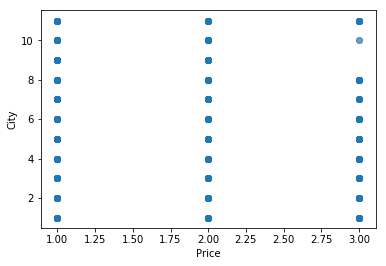

In [15]:
#city and price
import matplotlib.pyplot as plt
ylabel = data_df["city_digit"]
plt.ylabel("City")
plt.xlabel("Price")
xlabel = data_df["price_digit"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

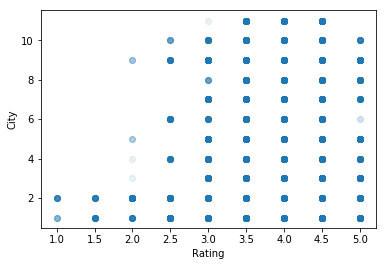

In [18]:
#city and rating
ylabel = data_df["city_digit"]
plt.ylabel("City")
plt.xlabel("Rating")
xlabel = data_df["rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

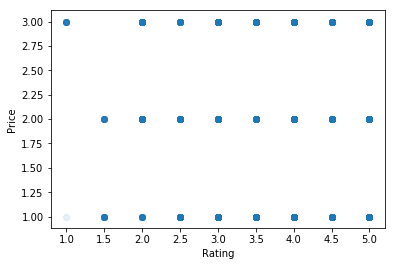

In [19]:
#price and rating
ylabel = data_df["price_digit"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = data_df["rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

In [ ]:
#correlation between attributes

In [20]:
#from city
corr_matrix = data_df.corr()
corr_matrix["city_digit"].sort_values(ascending = False)

city_digit     1.000000
price_digit   -0.024793
rating        -0.070388
Name: city_digit, dtype: float64

In [22]:
#from price
corr_matrix = data_df.corr()
corr_matrix["price_digit"].sort_values(ascending = False)

price_digit    1.000000
city_digit    -0.024793
rating        -0.132781
Name: price_digit, dtype: float64

In [23]:
#from rating
corr_matrix = data_df.corr()
corr_matrix["rating"].sort_values(ascending = False)

rating         1.000000
city_digit    -0.070388
price_digit   -0.132781
Name: rating, dtype: float64

In [ ]:
#store the reviews into list

In [16]:
all_reviews = data_df["review_desc"]
all_reviews

76260              After a few years, the menu has changed.
150061                                    Taste : 3⭐️\r\n4.
176000    The restaurant was not busy, but the service t...
30421       Generous servings of beef slices, veg and eggs.
93405                                  !you have to try it.
137665       The facility is very nice and staff very good.
142303           nice family restaurant its like a garden .
71181     The staff are very friendly and accommodating ...
62971     Picked many fishes, crabs, squids and a huge l...
114070                Knows a lot and nothing is a problem.
51390     Staff v v courteous and helpful esp a young La...
17205     The waiter did not serve well at all, in fact ...
14066     Friendly atmosphere, attentive staff & yummy f...
145721      It had the fastest WiFi we have seen in Canggu.
17800     !, The kambing bakar is actually something not...
92647     Simple kopi is a nice warung with a small but ...
87633     Not sure what meat was used in

In [17]:
#reset_index
data_df = data_df.reset_index(drop=True)
data_df

,city,price,rating,restaurant,review_desc,city_digit,price_digit
0,bali,mid range,4.0,Warung Jerami,"After a few years, the menu has changed.",2.0,2.0
1,malang,mid range,3.5,Malang Strudel,Taste : 3⭐️\r\n4.,7.0,2.0
2,bandung,mid range,3.5,The Kiosk,"The restaurant was not busy, but the service t...",3.0,2.0
3,jakarta,cheap eats,4.0,Kuetiaw Sapi Aciap,"Generous servings of beef slices, veg and eggs.",1.0,1.0
4,bali,mid range,4.5,Ikan Restaurant & Bar,!you have to try it.,2.0,2.0
5,jakarta,fine dining,4.0,Kembang Goela,The facility is very nice and staff very good.,1.0,3.0
6,batam,mid range,4.0,Pondok Batam Kuring Restaurant,nice family restaurant its like a garden .,9.0,2.0
7,bali,mid range,4.0,Pulu Bar and Restaurant,The staff are very friendly and accommodating ...,2.0,2.0
8,jakarta,mid range,4.0,Seafood City Restaurant by Bandar Djakarta,"Picked many fishes, crabs, squids and a huge l...",1.0,2.0
9,bali,mid range,4.5,Terracotta,Knows a lot and nothing is a problem.,2.0,2.0


In [ ]:
#make list for sentiments value and sentiment description

In [18]:
all_reviews = data_df['review_desc']
all_sent_values = []
all_sentiments = []

In [ ]:
#generate sentiment value per word sentiment value between -1 to 1 (negative to positive)

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [20]:
#test the sentiment
sample = data_df['review_desc'][0]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

After a few years, the menu has changed.
Sentiment: 
0.0


In [ ]:
#store sentiment value for each review in the list
for i in range(0,160765):
    all_sent_values.append(sentiment_value(all_reviews[i]))

In [35]:
len(all_sent_values)

160765

In [36]:
#create new datframe of Sentiment Analysis on 160765 rows
temp_data = data_df[0:160765]

In [37]:
temp_data.shape

(160765, 7)

In [38]:
#store sentment value and sentiment description to the list, difine the values follows the rating
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,160765):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)

In [39]:
#put it temp_data

temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

/home/finasu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/finasu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:
temp_data

,city,price,rating,restaurant,review_desc,city_digit,price_digit,SENTIMENT_VALUE,SENTIMENT
0,jakarta,mid range,4.5,Rose Garden,"Rose Garden is a large restaurant, quiet that ...",1.0,2.0,4,Positive
1,jakarta,mid range,4.0,Pandan Bistro,Eventhough the environment is nice but I wont ...,1.0,2.0,5,V.Positive
2,bali,mid range,4.0,"Warung Laota, Sunset Road",But once we tried the oyster with egg it was d...,2.0,2.0,3,Neutral
3,jakarta,mid range,4.0,Shisha Cafe,Great for dates and when u need some private t...,1.0,2.0,5,V.Positive
4,batam,mid range,4.5,Sop Ikan Tiam Huat,Their speciality is the hot and sour sauce fish.,9.0,2.0,3,Neutral
5,bali,fine dining,4.5,Ma-Joly,It looked fairly nice from the street so we ga...,2.0,3.0,4,Positive
6,jakarta,cheap eats,4.0,Oasis Shisha,Tbe food is one of the worst middle eastern fo...,1.0,1.0,1,V.Negative
7,bandung,cheap eats,4.5,Kupat Tahu Gempol,"If you are a traveller on a food hunt, do shar...",3.0,1.0,5,V.Positive
8,jakarta,mid range,4.0,Pizza Marzano Citiwalk Sudirman,The only thing they need to update is the cred...,1.0,2.0,4,Positive
9,bali,cheap eats,4.5,Indotopia,"I like going there, their Pho is really good a...",2.0,1.0,5,V.Positive


In [ ]:
#find sentiment and rating accuracy

In [41]:
counter = 0
for i in range(0,160765):
    if (abs(temp_data['rating'][i]-temp_data['SENTIMENT_VALUE'][i])>1):
        counter += 1

In [42]:
counter #36434 occurences where Rating and Sentiment in different value

36434

In [43]:
#percent the accurace
from __future__ import division
accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]
percent_accuracy = accuracy*100
percent_accuracy

77.33710695736012

In [ ]:
#see scater plot data

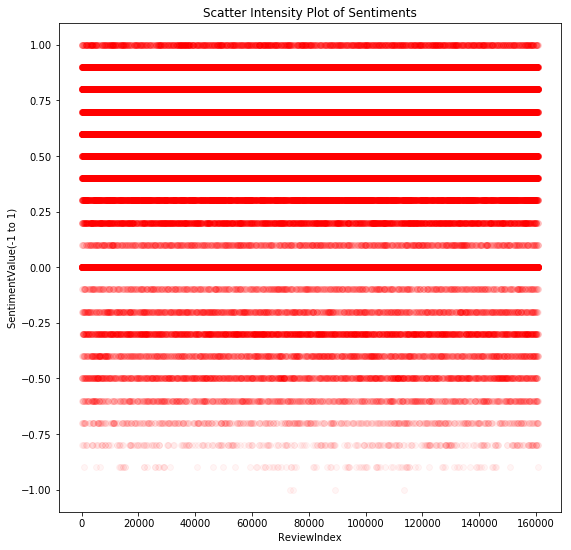

In [44]:
xaxis = []
for i in range(0,160765):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:160765]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()

In [45]:
#showing sentiment value and rating comparision of each city
testing2 = pd.pivot_table(temp_data,index=['city'],values=[ 'rating', 'SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'rating'), ascending = False)
testing2

sum                      mean          
           SENTIMENT_VALUE    rating SENTIMENT_VALUE    rating
city                                                          
bali                296657  304595.0        4.167585  4.279101
jakarta             170708  170474.5        3.937537  3.932152
bandung              47234   47928.5        3.897516  3.954823
yogyakarta           39115   40156.0        3.952607  4.057801
surabaya             36628   36606.5        3.942734  3.940420
semarang             13608   13976.5        3.867008  3.971725
malang               11532   11640.5        3.872398  3.908831
medan                11209   11540.0        3.935744  4.051966
batam                10617   10729.5        3.945373  3.987179
bogor                 7955    7987.5        3.861650  3.877427
palembang             3219    3277.0        3.887681  3.957729

In [47]:
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client.tripadvisor
collection = db.review_sentiment
collection.insert_many(temp_data.to_dict('records'))

In [48]:
temp_data.to_csv('reviews_sentiment.csv', index=False, encoding ="utf-8")

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True